In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('data\PreprocessedBankChurners.csv')
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,50,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,0,1,0,0
1,0,60,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,0,0,0,1,0
2,0,60,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,0,0,1,0,0
3,0,50,4,34,3,4,1,3313.0,2517,796.0,...,0,0,1,0,0,0,0,0,0,1
4,0,50,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,0,1,0,0,1,0,0


In [7]:
X = df.iloc[:, df.columns != 'Attrition_Flag']
y = df['Attrition_Flag']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [8]:
%%time 
x=0
for i in range(1000000):
    x = x+1

Wall time: 113 ms


In [9]:
rfc = RandomForestClassifier(random_state = 42)
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [10]:
import time
time.ctime()

'Mon Jan 18 14:17:57 2021'

In [11]:
%%time
param_grid = {    
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_features': list(range(1,X_train.shape[1])),
    'max_depth' : np.arange(1,10)}
rfc = RandomForestClassifier(random_state = 42)

rfc_cv= GridSearchCV(rfc,param_grid,cv=5)
rfc_cv.fit(X_train,y_train)

Wall time: 1h 35min 45s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]})

In [12]:
import time
time.ctime()

'Mon Jan 18 15:53:43 2021'

In [13]:
rfc_cv.best_params_

{'max_depth': 9, 'max_features': 21, 'n_estimators': 100}

In [14]:
rfc_best_param = RandomForestClassifier(n_estimators=100, max_depth=9, max_features=21, criterion = 'entropy', random_state=42)
rfc_best_param.fit(X_train, y_train)
y_pred = rfc_best_param.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred))

[[2077   33]
 [  61  361]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2110
           1       0.92      0.86      0.88       422

    accuracy                           0.96      2532
   macro avg       0.94      0.92      0.93      2532
weighted avg       0.96      0.96      0.96      2532



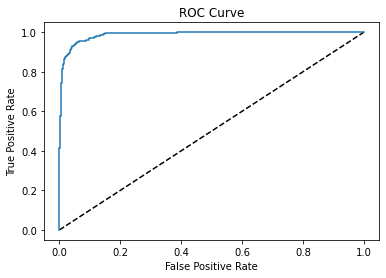

In [19]:
y_pred_prob = rfc_best_param.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9878484310774692

### Conclusion

The accuracy is better than Logistic regression and the recall is also 0.86, but can do better. 